import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as skim
from skimage import io
from skimage.util import crop
import matplotlib.image as mpimg

definition function

In [2]:
def thresholding(thresh,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>thresh and img[i,j][1]>thresh and img[i,j][2]>thresh ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [3]:
def thresholding_2value(min_th,max_th,img):
    nrow, ncol, ncolor  = img.shape
    new_img = img.copy()
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0]>max_th and img[i,j][1]>max_th and img[i,j][2]>max_th ):
                new_img[i,j] = [255,255,255]
            if(img[i,j][0]<min_th and img[i,j][1]<min_th and img[i,j][2]<min_th ):
                new_img[i,j] = [255,255,255]
    # plt.imshow(new_img)
    return new_img

In [4]:
def find_length(img,position = True): #input must thresholding before
    nrow, ncol, ncolor  = img.shape
    right_position = []
    left_position = []
    #find all left side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            if(img[i,j][0] < 255 ):
                temp1.append((i,j))
                break
    #find true left side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    min_col = np.min(temp2)
    #find center true left side
    temp3 = []
    for i in range(nrow):
        if(img[i,min_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    left_position = [min_row,min_col]
    # print(left_position)

    #find all right side
    temp1 = []
    for i in range(nrow):
        for j in range(ncol):
            i_inverse = (nrow-1) - i
            j_inverse = (ncol-1) - j
            if(img[i_inverse,j_inverse][0] < 255 ):
                temp1.append((i_inverse,j_inverse))
                break
    #find true right side
    temp2 = []
    for i in range(len(temp1)):
        temp2.append(temp1[i][1])
    max_col = np.max(temp2)
    #find center true right side
    temp3 = []
    for i in range(nrow):
        if(img[i,max_col][0] < 255 ):
            temp3.append(i)
    if(len(temp3) == 1):
        min_row = temp3[0]
    elif(len(temp3)%2 == 0):
        min_row = temp3[int(len(temp3)/2)]
    else:
        min_row = temp3[int(len(temp3)/2) + 1]
    right_position = [min_row,max_col]
    if(position == True):
        print(left_position)
        print(right_position)

    #find length with pythagoras theorem
    base = np.abs(right_position[1] - left_position[1])
    perp = np.abs(left_position[0] - right_position[0])
    length = np.hypot(base, perp)
    # print("length of picture is " , length , str("pixel"))
    return length
    

In [5]:
def plot_compare_img(img1,img2):
    plt.figure(figsize=(20,10))
    plt.subplot(121), plt.imshow(img1), plt.axis('off') 
    plt.subplot(122), plt.imshow(img2), plt.axis('off') 
    plt.show()  

In [6]:
def plot_histogram(img):
    _ = plt.hist(img.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(img[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(img[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(img[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    _ = plt.xlabel('Intensity Value')
    _ = plt.ylabel('Count')
    _ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    plt.show()

In [22]:
def pixel_to_cm(pixel):
    return (pixel*0.5)/64

make measure image

In [8]:
def_img = io.imread("image\\10.08.2020 Heptane-water\\frame 3\\12-06-08 PM\\10.08.2020 (3) 2181.jpg", as_gray=False)
def_img.shape

(1080, 1920, 3)

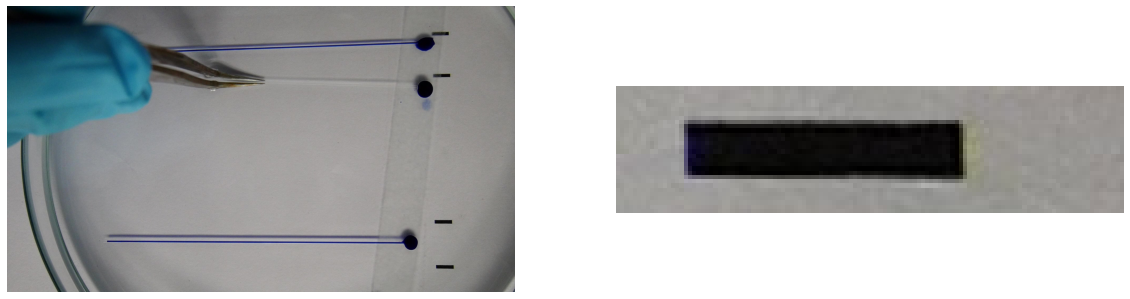

In [19]:
measure_im = crop(def_img, ((800, 250), (1600, 200), (0,0)), copy=False)
# print(def_img.shape, measure_im.shape)
plot_compare_img(def_img,measure_im)

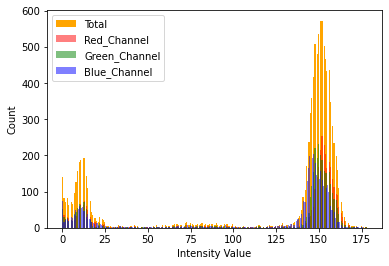

In [20]:
plot_histogram(measure_im)

[15, 17]
[16, 81]


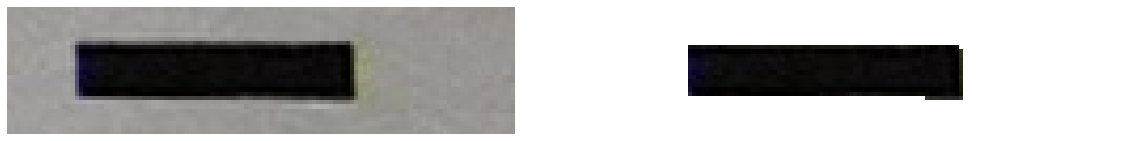

length of picture is  64.00781202322104 pixel


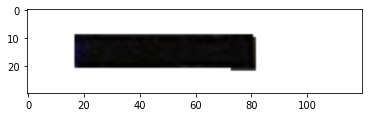

In [21]:
thresh_measure_im = thresholding(50,measure_im)
l = find_length(thresh_measure_im)
plot_compare_img(measure_im,thresh_measure_im)
plt.imshow(thresh_measure_im)
print("length of picture is " , l , str("pixel"))

64 pixel = 0.5 cm

x pixel = y cm


y cm = (x pixel* 0.5) / 64


find definition length on 3571 picture

(1080, 1920, 3) (105, 633, 3)


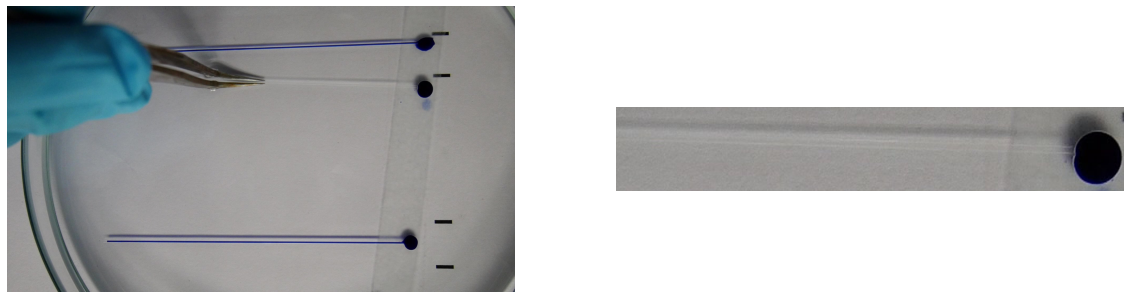

In [71]:
def_crop_im = crop(def_img, ((250, 725), (980, 307), (0,0)), copy=False)
print(def_img.shape, def_crop_im.shape)
plot_compare_img(def_img,def_crop_im)

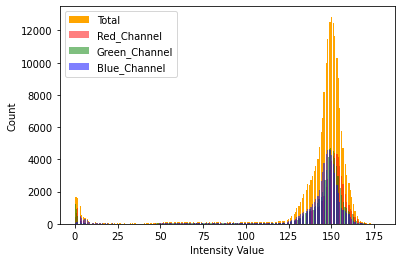

In [72]:
plot_histogram(def_crop_im)

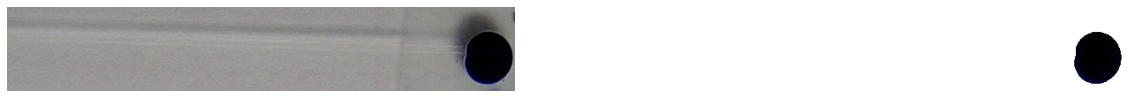

In [73]:
Tdef_img2 = thresholding(30,def_crop_im)
plot_compare_img(def_crop_im,Tdef_img2)


[71, 571]
[64, 629]
ldef  58.42088667591412 pixel


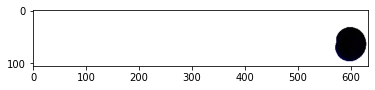

In [74]:
ldef = find_length(Tdef_img2)
plt.imshow(Tdef_img2)
print("ldef " , ldef , str("pixel"))

find length on crop value 1 from 2181 to 2240

In [82]:
number_of_picture = 2181
thresh = 30
template1 = []
l_def = 58.42088667591412
#2240-2181 = 59
for i in range(60):
    if(True) :   
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 3\\12-06-08 PM\\10.08.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((250, 725), (980, 307), (0,0)), copy=False)
        thresh_image = thresholding(thresh,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template1.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)
        # for i in range(len(template1)/2):
        #     if(template1[i] > 70):


In [83]:
print(template1)
print(len(template1))

[0, 0, 0, -1, 0, 1, 3, 5, 7, 8, 12, 14, 15, 17, 20, 26, 27, 29, 32, 36, 41, 43, 45, 48, 52, 55, 58, 60, 63, 66, 69, 72, 75, 77, 80, 83, 87, 89, 94, 97, 99, 100, 101, 106, 110, 115, 118, 118, 120, 124, 127, 131, 133, 135, 139, 143, 146, 150, 152, 155]
60


find length on crop value 2 from 2241 to 3144 in this case use 1 crop value

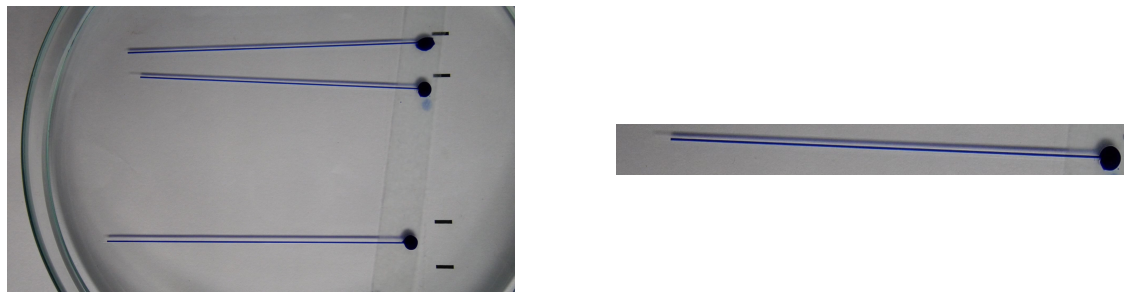

In [79]:
image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 3\\12-06-08 PM\\10.08.2020 (3) " + str(3144).zfill(4) + ".jpg" )
crop_image = crop(image, ((230, 725), (370, 308), (0,0)), copy=False)
plot_compare_img(image,crop_image)

In [84]:
number_of_picture = 2241
thresh = 30
template2 = []
l_def = 58.42088667591412
#3144-2241 = 903
for i in range(904):
    if( True) :
        image = mpimg.imread( "image\\10.08.2020 Heptane-water\\frame 3\\12-06-08 PM\\10.08.2020 (3) " + str(number_of_picture + i).zfill(4) + ".jpg" )
        crop_image = crop(image, ((230, 725), (370, 308), (0,0)), copy=False)
        if(True):
            thresh_image = thresholding(thresh,crop_image)
        else:
            thresh_image = thresholding(40,crop_image)
        # plot_compare_img(crop_image,thresh_image)
        # print(i)
        length = find_length(thresh_image,False)
        length = length - l_def
        length = int(length)
        template2.append(length)
        # print(i, length)
        # plt.figure()
        # plt.imshow(thresh_image)

In [85]:
print(template2)
print(len(template2))

[157, 160, 164, 167, 172, 174, 177, 180, 182, 186, 189, 193, 195, 198, 202, 205, 208, 211, 215, 217, 220, 224, 227, 231, 234, 237, 238, 241, 245, 249, 253, 255, 258, 261, 265, 269, 272, 273, 277, 280, 284, 287, 290, 292, 295, 298, 302, 306, 309, 311, 314, 317, 320, 325, 326, 329, 332, 336, 339, 341, 344, 347, 351, 354, 356, 359, 361, 365, 368, 372, 375, 378, 381, 384, 387, 390, 392, 394, 397, 401, 404, 407, 409, 412, 415, 419, 422, 424, 427, 429, 432, 435, 439, 442, 444, 446, 450, 452, 457, 460, 461, 464, 467, 470, 473, 475, 479, 482, 485, 489, 491, 493, 496, 499, 502, 504, 508, 510, 513, 516, 518, 522, 524, 527, 530, 533, 536, 538, 541, 544, 547, 549, 552, 555, 558, 560, 563, 565, 568, 571, 574, 577, 579, 582, 585, 587, 590, 592, 595, 598, 600, 603, 605, 608, 611, 612, 615, 618, 621, 623, 626, 628, 631, 633, 636, 638, 641, 644, 646, 650, 653, 654, 657, 659, 662, 664, 667, 669, 671, 673, 675, 679, 684, 689, 693, 694, 696, 698, 700, 702, 704, 707, 709, 712, 715, 717, 719, 722, 724, 727,

concat 2 template and calculate pixel to centimeter

In [86]:
l_array = np.concatenate((template1,template2), axis=0)
# print(l_array)
# print(type(l_array[1]))
# print(l_array.shape)
l_array = l_array.astype('float32')

#find missing value and set to 0
for i in range(len(l_array)):
    if(l_array[i] < 0 ):
        l_array[i] = 0

for i in range(len(l_array)):
    l_array[i] = pixel_to_cm(l_array[i])

In [87]:
print(l_array)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 7.8125000e-03 2.3437500e-02 3.9062500e-02 5.4687500e-02 6.2500000e-02
 9.3750000e-02 1.0937500e-01 1.1718750e-01 1.3281250e-01 1.5625000e-01
 2.0312500e-01 2.1093750e-01 2.2656250e-01 2.5000000e-01 2.8125000e-01
 3.2031250e-01 3.3593750e-01 3.5156250e-01 3.7500000e-01 4.0625000e-01
 4.2968750e-01 4.5312500e-01 4.6875000e-01 4.9218750e-01 5.1562500e-01
 5.3906250e-01 5.6250000e-01 5.8593750e-01 6.0156250e-01 6.2500000e-01
 6.4843750e-01 6.7968750e-01 6.9531250e-01 7.3437500e-01 7.5781250e-01
 7.7343750e-01 7.8125000e-01 7.8906250e-01 8.2812500e-01 8.5937500e-01
 8.9843750e-01 9.2187500e-01 9.2187500e-01 9.3750000e-01 9.6875000e-01
 9.9218750e-01 1.0234375e+00 1.0390625e+00 1.0546875e+00 1.0859375e+00
 1.1171875e+00 1.1406250e+00 1.1718750e+00 1.1875000e+00 1.2109375e+00
 1.2265625e+00 1.2500000e+00 1.2812500e+00 1.3046875e+00 1.3437500e+00
 1.3593750e+00 1.3828125e+00 1.4062500e+00 1.4218750e+00 1.4531250e+00
 1.476

export data to exel

In [88]:
import pandas as pd

In [89]:
print(len(l_array))

964


In [90]:
data = []
num_img = 2181
for i in range(len(l_array)):
    data.append(( " 10.08.2020 (3) " + str(num_img + i).zfill(4)  ,l_array[i] )) 
# print(data)
dataframe = pd.DataFrame(data, 
             columns=['image_name', 
                      'length(cm)'])
# print(dataframe)
# writing to Excel
datatoexcel = pd.ExcelWriter('Heptane-water(3)_10.08.2020_12-06-08-PM.xlsx')
# write DataFrame to excel 
dataframe.to_excel(datatoexcel)
#save the excel
datatoexcel.save()


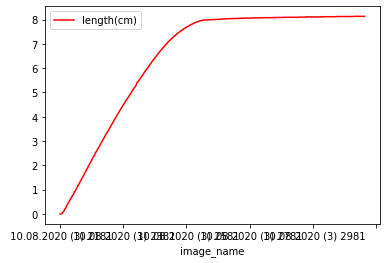

In [91]:
dataframe.plot(kind='line',x='image_name',y='length(cm)',color='red')
plt.show()